[*********************100%***********************]  1 of 1 completed


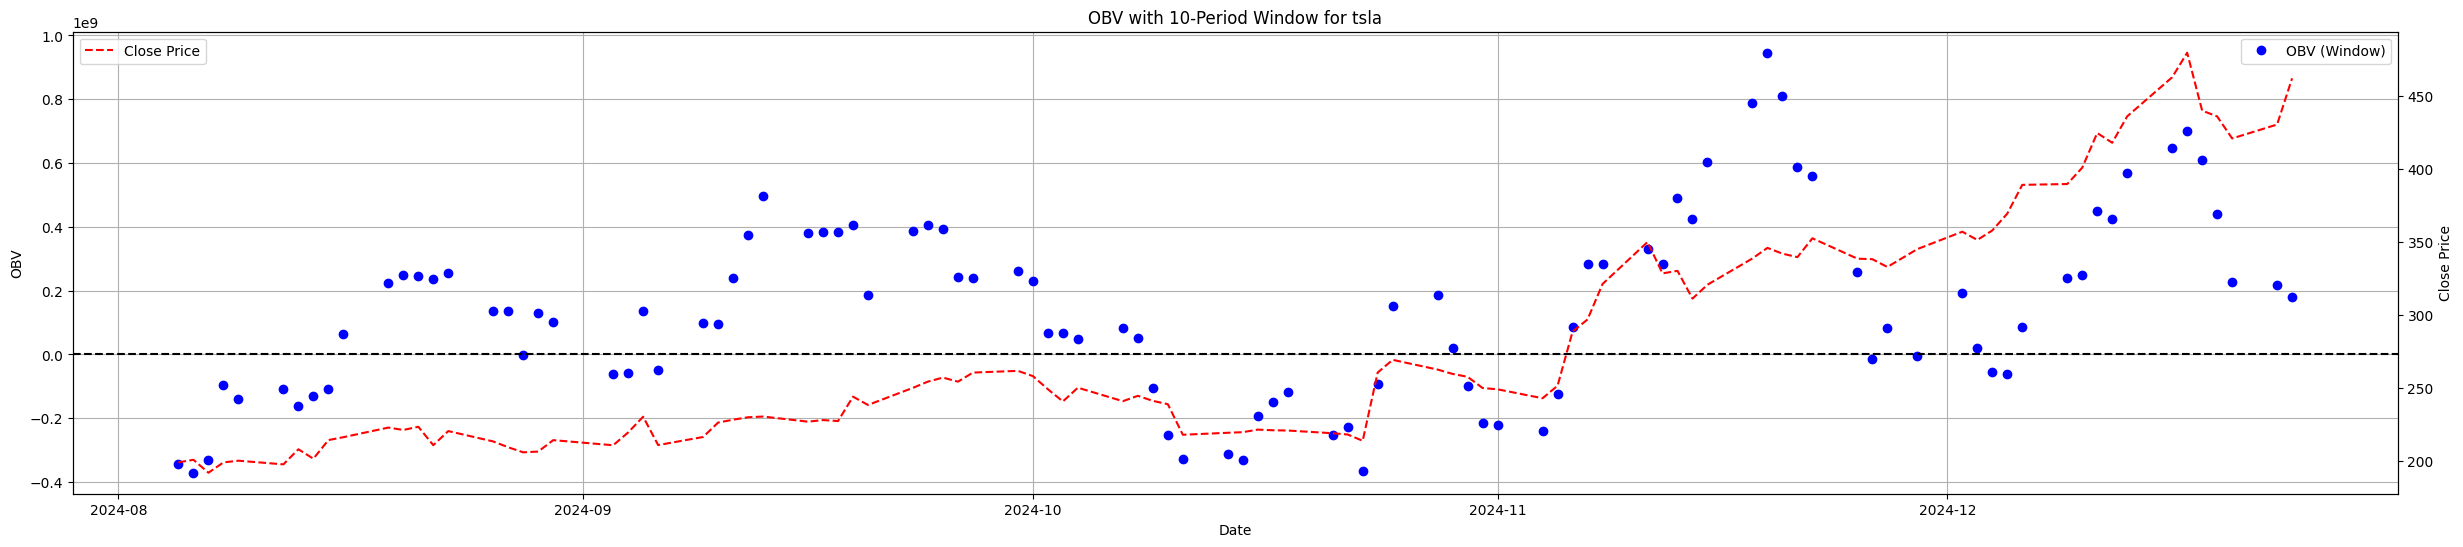

Ticker: tsla
Price            Close     Volume   OBV_Window
Ticker            TSLA       TSLA             
Date                                          
2024-12-18  440.130005  149340800  [609094700]
2024-12-19  436.170013  118566100  [439717700]
2024-12-20  421.059998  132216200  [226097900]
2024-12-23  430.600006   72698100  [217340200]
2024-12-24  462.279999   59551800  [180532800]


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


data_cache = {}

def calculate_obv_with_window(data, window=5):
    """
    Calculate OBV (On-Balance Volume) using a specified window size.

    Parameters:
    data (DataFrame): A DataFrame with 'Close' and 'Volume' columns.
    window (int): The number of recent periods to consider for OBV calculation.

    Returns:
    DataFrame: A DataFrame with an additional 'OBV_Window' column.
    """
    obv = [0]  # Initialize OBV with the first value as 0
    obv_changes = [0]  # Initialize OBV changes list to keep track of recent changes

    for i in range(1, len(data)):
        obv_change = 0
        if data['Close'].values[i] > data['Close'].values[i - 1]:
            obv_change = data['Volume'].values[i]
        elif data['Close'].values[i] < data['Close'].values[i - 1]:
            obv_change = -data['Volume'].values[i]

        obv_changes.append(obv_change)
        rolling_obv = sum(obv_changes[max(0, i-window):i+1])
        obv.append(rolling_obv)

    data['OBV_Window'] = obv
    return data

def get_stock_data_from_cache(ticker, start_date, end_date):
    """
    Retrieve stock data from cache or download if not available.
    """
    if ticker in data_cache:
        print(f"Loading data for {ticker} from cache...")
        data = data_cache[ticker]
        # 필터링하여 요청된 날짜 범위만 반환
        return data.loc[start_date:end_date]
    else:
        print(f"Downloading data for {ticker}...")
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            data_cache[ticker] = data  # 다운로드한 데이터 캐시에 저장
        else:
            print(f"No data found for {ticker}.")
        return data

time = 100
time = - time
def analyze_and_plot_tickers(tickers, start_date, end_date, window=5):
    """
    Analyze and plot OBV for a list of tickers.

    Parameters:
    tickers (list): List of stock tickers.
    start_date (str): Start date for fetching data (format: YYYY-MM-DD).
    end_date (str): End date for fetching data (format: YYYY-MM-DD).
    window (int): The window size for OBV calculation.
    """
    results = {}

    for ticker in tickers:
        data = get_stock_data_from_cache(ticker, start_date, end_date)

        if data is not None and 'Close' in data.columns and 'Volume' in data.columns:
            data = calculate_obv_with_window(data, window=window)  # Assuming this function is defined elsewhere
            results[ticker] = data

            # Plot the OBV
            plt.figure(figsize=(30, 6))
            plt.plot(
                data.index[time:],
                data['OBV_Window'][time:],
                marker="o",
                linestyle="none",  # 선을 없앰
                label='OBV (Window)',
                color='blue'
            )
            plt.title(f'OBV with {window}-Period Window for {ticker}')
            plt.xlabel('Date')
            plt.ylabel('OBV')
            plt.legend()
            plt.grid()

            highlight_dates = []

            # Highlight crossing points
            for i in range(1, len(data)):
                prev_value = data['OBV_Window'].iloc[i - 1]
                curr_value = data['OBV_Window'].iloc[i]
                if str(data.index[i]) in highlight_dates:
                  plt.axvline(x=data.index[i], color='red', linestyle='--')
                if prev_value >= 0 and curr_value < 0:
                    pass #plt.axvline(x=data.index[i], color='red', linestyle='--')
                elif prev_value <= 0 and curr_value > 0:
                    pass #plt.axvline(x=data.index[i], color='blue', linestyle='--')

            plt.axhline(y=0, color='black', linestyle='--')



            # Highlight specific dates


            # Add Close price on a secondary y-axis
            plt.twinx()
            plt.plot(data.index[time:], data['Close'][time:], label='Close Price', color='red', linestyle='--')
            plt.ylabel('Close Price')
            plt.legend(loc='upper left')
            plt.show()
        else:
            print(f"Data for {ticker} does not contain 'Close' or 'Volume' columns.")

    return results



tickers = ["tsla"]
start_date = '2020-11-01'
end_date = '2024-12-31'
window = 10 # 24

results = analyze_and_plot_tickers(tickers, start_date, end_date, window=window)

# Print the last few rows of the dataset for each ticker
for ticker, data in results.items():
    print(f"Ticker: {ticker}")
    print(data[['Close', 'Volume', 'OBV_Window']].tail())
